<a href="https://colab.research.google.com/github/kiyong21c/kaggle/blob/main/20220808_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 승객 정보 데이터셋 이용 → 생존 여부 확인
 - 알고리즘 : 로지스틱 회귀(Logistic Regresion)
 - 문제유형 : 분류
 - 평가지표 : 정확도

## 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
file_url = 'http://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data = pd.read_csv(file_url)

## 데이터 확인

In [2]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


 - Pclass : 티켓 클래스
 - SibSp : 함께 탑승한 형제 및 배우자의 수
 - Parch : 함께 탑승한 부모 및 자녀의 수
 - Embarked : 승선한 항구
 - Survived : 생존유무(1:생존)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [4]:
data.describe()

,Pclass,Age,SibSp,Parch,Survived
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.311586,29.315152,0.524184,0.382452,0.382452
std,0.834700,12.984932,1.103705,0.806761,0.486260
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,1.000000


In [5]:
data.corr() # 상관관계 출력 : 자료형이 object와 같이 숫자가 아니면 나타나지 않는다

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


In [6]:
round(data.corr(), 2)

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.00,-0.34,0.08,0.02,-0.34
Age,-0.34,1.00,-0.23,-0.17,-0.07
SibSp,0.08,-0.23,1.00,0.41,-0.03
Parch,0.02,-0.17,0.41,1.00,0.08
Survived,-0.34,-0.07,-0.03,0.08,1.00


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

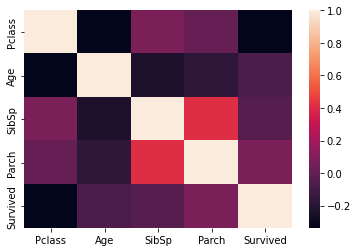

In [8]:
sns.heatmap(data.corr()) # 상관관계에 대한 히트맵 생성
plt.show()

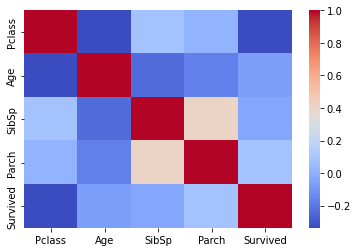

In [9]:
sns.heatmap(data.corr(), cmap='coolwarm') # 상관관계에 대한 히트맵 생성
plt.show()

 - 극명하게 대비를 주는 coolwarm색상을 적용

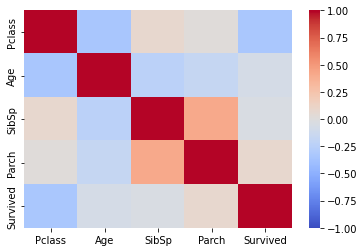

In [10]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1) # 상관관계에 대한 히트맵 생성
plt.show()

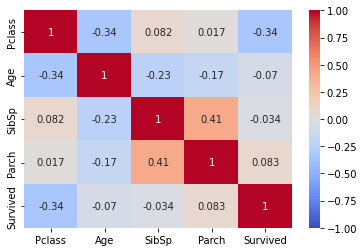

In [11]:
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True) # 상관관계에 대한 히트맵 생성
plt.show()

## 전처리 : 범주형 변수 변환(원-핫 인코딩)
 - 타이타닉 데이터셋의 object : Name, Sex, Ticket, Embarked

In [14]:
object_name = ['Name', 'Sex', 'Ticket', 'Embarked']
for i in object_name:
    print(f'{i}:', data[i].nunique())

Name: 889
Sex: 2
Ticket: 680
Embarked: 3


 - Name, Ticket은 고윳값이 수백가지이므로 원핫인코딩시 수많은 컬럼이 생기므로 제외

In [15]:
data = data.drop(['Name', 'Ticket'], axis=1)

In [16]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,3,male,22.0,1,0,S,0
1,1,female,38.0,1,0,C,1
2,3,female,26.0,0,0,S,1
3,1,female,35.0,1,0,S,1
4,3,male,35.0,0,0,S,0


In [17]:

# 판다스의 원핫인코딩 함수 활용 : get_dummies(data, columns=['col이름'])
pd.get_dummies(data, columns=['Sex', 'Embarked'])

,Pclass,Age,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,0,1,0,0,1
1,1,38.0,1,0,1,1,0,1,0,0
2,3,26.0,0,0,1,1,0,0,0,1
3,1,35.0,1,0,1,1,0,0,0,1
4,3,35.0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,0,1,0,0,1
885,1,19.0,0,0,1,1,0,0,0,1
886,3,28.0,1,2,0,1,0,0,0,1
887,1,26.0,0,0,1,0,1,1,0,0


 - 더미변수가 생기면서 기존의 변수는 사라짐
 - Sex의 경우 Sex_female, Sex_male로 구분되었는데, 둘 다 필요하지는 않다(하나만 남겨도 됨)
 - 컬럼(변수)를 줄여서 데이터 계산량을 줄인다

  > get_dummies(drop_first=True)

In [19]:
pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
884,2,27.0,0,0,0,1,0,1
885,1,19.0,0,0,1,0,0,1
886,3,28.0,1,2,0,0,0,1
887,1,26.0,0,0,1,1,0,0


In [20]:
data = pd.get_dummies(data, columns=['Sex','Embarked'], drop_first=True)

In [21]:
## 모델링 및 예측하기
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1) # 데이터셋에서 종속변수(Target) 제거
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [22]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 임포트

In [23]:
model = LogisticRegression() # 로지스틱 회귀 모델 생성
model.fit(X_train, y_train) # 모델 학습

LogisticRegression()

In [25]:
pred = model.predict(X_test)

## 예측 모델 평가
 - 이진분류 평가 지표 : 정확도, 오차 행렬, 정밀도, 재현율, F1, 민감도, 특이도, AUC

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7808988764044944

 - 가령 0이 95%이고, 1이 5%로 구성된 이진분류인 경우, 정확도가 90%라고 하더라도 좋은 값이라고 볼 수 없다.
 - 머신러닝 모델 없이 모든 값을 0이라고 예측해도 95% 정확도가 나올 수 있음

  > 고윳값이 비슷한 비율이면 정확도를 올바르게 적용할 수 있음

In [35]:
sum(pred == y_test) / len(y_test)

0.7808988764044944

In [36]:
model.coef_

array([[-1.18229807, -0.03992439, -0.32137838,  0.00798081, -2.56862996,
        -0.07847763, -0.23534439]])

 - 선형회귀분석에서는 coef_가 리스트 형태 : array([1,2,3,...])
 - 로지스틱회귀분석에서는 coef_가 이중 리스트 형태 : array([[1,2,3,...]])

In [38]:
pd.Series(model.coef_[0], index=X.columns)

Pclass       -1.182298
Age          -0.039924
SibSp        -0.321378
Parch         0.007981
Sex_male     -2.568630
Embarked_Q   -0.078478
Embarked_S   -0.235344
dtype: float64

 - Parch는 부모와 자식, SibSp는 형제/자매, 결국 모두 가족구성원이라는 공통점 → 두 변수를 합하여 가족구성원 숫자를 나타내는 변수로

In [40]:
data['family'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch'], axis=1, inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [43]:
# 피처엔지니어링 후 모델링 → 평가
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred) # 정확도 예측 모듈

0.7921348314606742

## 로지스틱 회귀 이해하기
 - 이진분류 문제(0, 1 예측)에 왜 선형 회귀 분석을 사용하지 않는가?

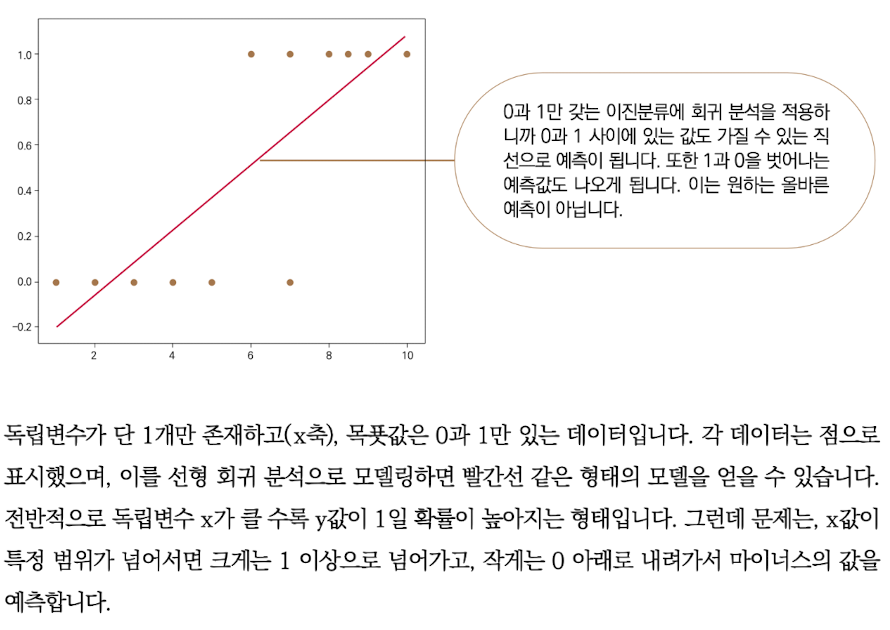

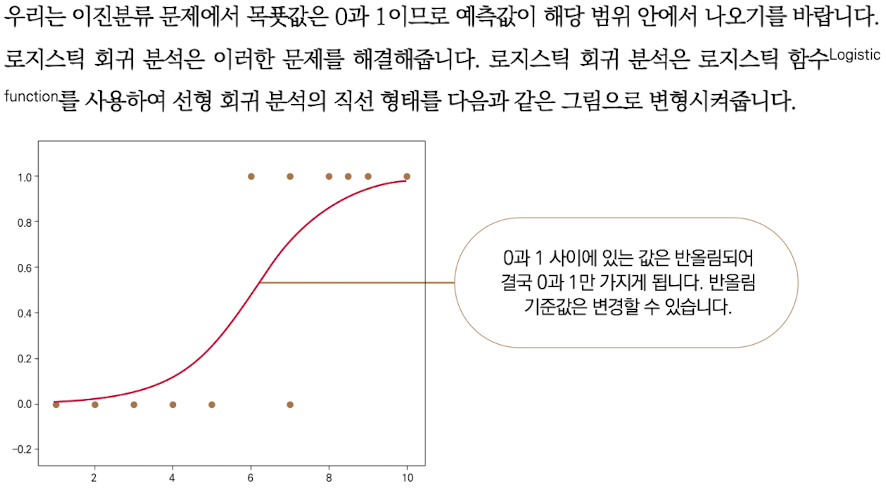